# All experiments on Supervised (labeled) Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook
%matplotlib inline

## Preprocessing Data

In [2]:
hasLabel = True

df = pd.read_csv("data/Talus_Syene.csv", sep=';') # Talus_Syene - Talus_london_Soay - Talus_Halle_Karakul - Talus_Halle_Marsch - Talus_Chicago

# For the combined set of both Halle sets

#df2 = pd.read_csv("data/Talus_Halle_Marsch.csv", sep=';')
#df = pd.concat([df, df2]).sample(frac=1).reset_index(drop=True)

df.head(10)

,Alter_grob,Geschlecht0,Sex,GLl,GLm,Dl,Bd
0,volladult,maennlich,m,31.6,29.7,17.6,21.3
1,jungadult,weiblich,f,32.4,30.4,18.2,20.0
2,volladult,weiblich,f,31.2,28.7,17.0,NaN
3,jungadult,maennlich,m,31.5,29.3,17.3,20.6
4,jungadult,weiblich,f,33.0,NaN,17.7,18.6
5,jungadult,maennlich/kastriert?,m,35.3,33.2,19.6,22.3
6,jungadult,weiblich,f,32.0,30.5,17.9,20.3
7,jungadult,weiblich,f,30.9,29.5,17.2,19.2
8,jungadult,maennlich,m,33.5,30.6,18.3,20.6
9,volladult,maennlich,m,33.1,32.3,NaN,21.4


In [3]:
def clean_df(df, columns, target, name_male, name_female):
    X = df[columns].astype(float)
    X = pd.concat([X, df[target]], axis=1)
    X = X.dropna(axis=0).reset_index(drop=True)
    X = X.replace(to_replace=name_male, value='1').replace(to_replace=name_female, value='0').replace(to_replace='c', value='1')

    label = X[target]

    X = X.drop(target, axis=1)
    
    return X, label

In [4]:
col_talus = ['GLl', 'GLm', 'Dl', 'Bd']

if hasLabel:
    X, y = clean_df(df, col_talus, ['Sex'], 'm', 'f')
else:
    X = df[col_talus].astype(float)
    X = X.dropna(axis=0).reset_index(drop=True)
    y = []

In [5]:
print(X[:5])
print(f"Number of samples used: {len(X)}")
print(f"Dimensions of 'label': {len(y)}")

# Train-Test Split 90-10  80-20  75-25
if hasLabel:
    print(f"Number of males: {len(y.loc[y['Sex'] == '1'])} and number of females: {len(y.loc[y['Sex'] == '0'])}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    GLl   GLm    Dl    Bd
0  31.6  29.7  17.6  21.3
1  32.4  30.4  18.2  20.0
2  31.5  29.3  17.3  20.6
3  35.3  33.2  19.6  22.3
4  32.0  30.5  17.9  20.3
Number of samples used: 85
Dimensions of 'label': 85
Number of males: 39 and number of females: 46


### Boxplot for just the examined set (for Boxplots of all sets --> GenerateDistributionBoxplot.ipynb)

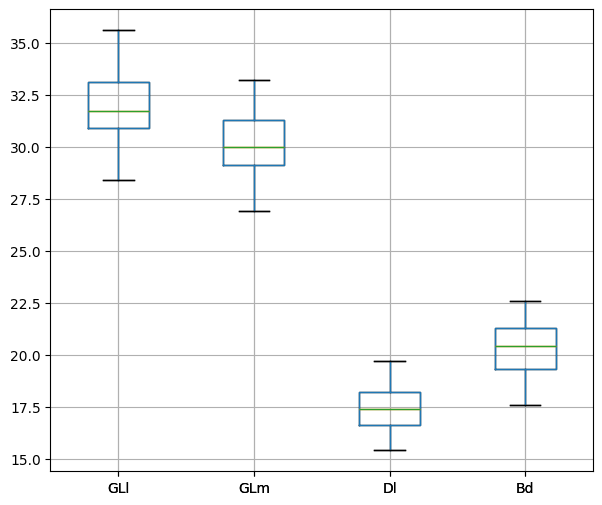

In [6]:
plt.rcParams['figure.figsize'] = [7, 6]

fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.boxplot(X)
boxplot = X.boxplot(column=col_talus)

fig1.savefig('Syene-boxplot.pdf', bbox_inches='tight')

### Scatterplot for sex distribution 2D

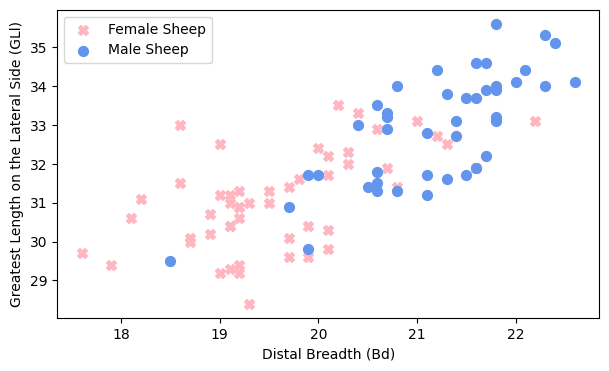

In [7]:
df_f = df.loc[df['Sex'] == 'f']
df_m = df.loc[df['Sex'] == 'm']

plt.rcParams['figure.figsize'] = [7, 4]

pltx = 'Bd'
plty = 'GLl'
colors = {'m':'cornflowerblue', 'f':'lightpink'}

fig = plt.figure()
ax = plt.axes()

plt.scatter(df_f[pltx], df_f[plty], s=50, c='lightpink', marker='X', label='Female Sheep')
plt.scatter(df_m[pltx], df_m[plty], s=50, c='cornflowerblue', marker='o', label='Male Sheep')
ax.set_xlabel('Distal Breadth (Bd)')
ax.set_ylabel('Greatest Length on the Lateral Side (GLl)')
ax.legend()

fig.savefig('Syene-Plot-2D.pdf', bbox_inches='tight')
plt.show()

### Scatterplot for sex distribution 3D

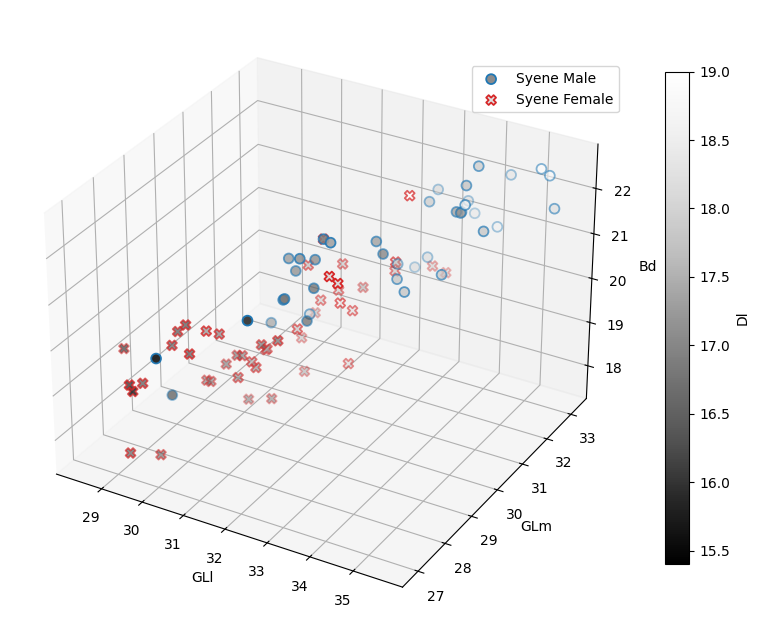

In [8]:
plt.rcParams['figure.figsize'] = [10, 8]

if hasLabel:
    df_f = df.loc[df['Sex'] == 'f']
    df_m = df.loc[df['Sex'] == 'm']

pltx = 'GLl'
plty = 'GLm'
pltz = 'Bd'
pltq = 'Dl'

fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)

my_cmap = plt.get_cmap('Greys_r')

if hasLabel:
    sctt = ax.scatter3D(df_m[pltx], df_m[plty], df_m[pltz], c = df_m[pltq], cmap = my_cmap, marker='o', edgecolors='tab:blue', linewidth=1.3, s=50, label = 'Syene Male')
    sctt = ax.scatter3D(df_f[pltx], df_f[plty], df_f[pltz], c = df_f[pltq], cmap = my_cmap, marker='X', edgecolors='tab:red', linewidth=1.3, s=50, label = 'Syene Female')
else:
    sctt = ax.scatter3D(df[pltx], df[plty], df[pltz], c = df[pltq], cmap = my_cmap, marker='o', edgecolors='grey', s=50)

#plt.title("")
ax.set_xlabel(pltx)
ax.set_ylabel(plty)
ax.set_zlabel(pltz)
if hasLabel:
    ax.legend(bbox_to_anchor=(1, 0.92), bbox_transform=ax.transAxes)

fig.colorbar(sctt, ax = ax, shrink = 0.8, label = pltq)
fig.savefig('Syene-Plot-3D.pdf', bbox_inches='tight')

plt.show()

In [9]:
# Help-Function to Calculate Accuracy

def check_acc(true, pred):
    
    true = true.to_numpy()
    accuracy = 0
    fn = 0
    
    for i in range(0, len(true)):
        if true[i] == pred[i]:
            accuracy += 1
        if true[i] != pred[i]:
            fn += 1
    
    result = accuracy/len(true)
    return result

## Supervised Methods

### kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def cv_kNN(X_train, y_train, k):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    kNN = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(kNN, X_train, y_train, scoring='accuracy', cv=cv)
    return cv_scores

def perform_kNN(X_train, X_test, y_train, y_test, k):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, np.ravel(y_train))
    y_pred = kNN.predict(X_test.values)
    
    acc = check_acc(y_test, y_pred)
    return y_pred, acc

In [11]:
# Test to find "good" k on Train set

In [12]:
max = 25
kNN_k_test = []
X_train_klein, X_test_klein, y_train_klein, y_test_klein = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

for i in range(1,max+1):
    tmp_result = perform_kNN(X_train_klein, X_test_klein, y_train_klein, y_test_klein, i)
    kNN_k_test.append(tmp_result[1])
print(kNN_k_test)

[0.8571428571428571, 0.7857142857142857, 0.6428571428571429, 0.7857142857142857, 0.8571428571428571, 0.7857142857142857, 0.9285714285714286, 0.8571428571428571, 0.9285714285714286, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 0.8571428571428571, 0.9285714285714286, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286]


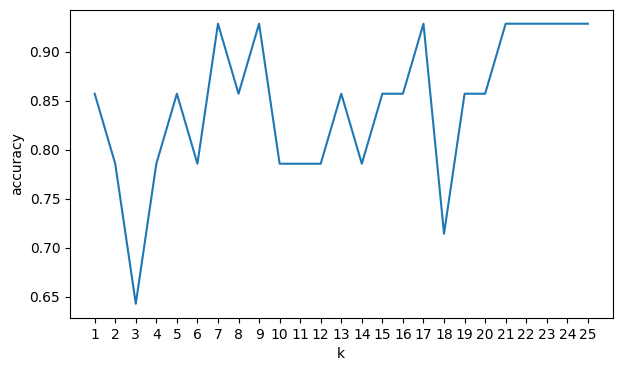

In [13]:
plt.rcParams['figure.figsize'] = [7, 4]

plt.plot(list(range(1, max+1)), kNN_k_test)
plt.xticks(list(range(1, max+1)))

plt.xlabel('k')#, fontsize=10)
plt.ylabel('accuracy')

plt.savefig('Syene-kTest.pdf', bbox_inches='tight')
plt.show()

In [14]:
kNN_scores = cv_kNN(X_train, y_train, 7)
print(np.mean(kNN_scores))
kNN_result = perform_kNN(X_train, X_test, y_train, y_test, 7)
kNN_result

0.7896825396825398


(array(['0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1',
        '0', '1', '0', '1'], dtype=object),
 0.8823529411764706)

### SVM

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
 
def cv_SVM(X_train, y_train, rs):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    sc = StandardScaler().fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
 
    svm = SVC(kernel= 'linear', random_state=rs, C=0.1)
    cv_scores = cross_val_score(svm, X_train_std, y_train, scoring='accuracy', cv=cv)
    return cv_scores

def perform_SVM(X_train, X_test, y_train, y_test, rs):

    sc = StandardScaler().fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
 
    svm = SVC(kernel= 'linear', random_state=rs, C=0.1)
    svm.fit(X_train_std, y_train)
 
    y_pred = svm.predict(X_test_std)
    acc = check_acc(y_test, y_pred)
    return y_pred, acc

In [16]:
SVM_scores = cv_SVM(X_train, y_train, 1)
print(SVM_scores)
print(f"Mean Accuracy: {np.mean(SVM_scores)}")
print(f"Max Accuracy: {np.max(SVM_scores)}")
SVM_result = perform_SVM(X_train, X_test, y_train, y_test, 1)
SVM_result

[0.85714286 0.71428571 0.42857143 0.85714286 0.57142857 1.
 0.57142857 0.85714286 1.         0.83333333 0.71428571 0.85714286
 0.57142857 0.71428571 1.         0.85714286 1.         0.57142857
 0.66666667 0.66666667 0.71428571 0.71428571 0.42857143 0.57142857
 0.85714286 1.         0.71428571 0.57142857 0.83333333 1.        ]
Mean Accuracy: 0.7571428571428573
Max Accuracy: 1.0


(array(['0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1',
        '0', '1', '0', '1'], dtype=object),
 0.8235294117647058)

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

def plot_DT(X_train, y_train, attr1, attr2, depth, rs):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=rs)

    X_train_np = X_train[[attr1, attr2]].to_numpy()
    y_train_np = y_train.to_numpy().flatten().astype(np.int_)

    tree.fit(X_train_np, y_train_np)
    return tree, X_train_np, y_train_np

def cv_DT(X_train, y_train, depth, rs):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=rs)
    cv_scores = cross_val_score(tree, X_train, y_train, scoring='accuracy', cv=cv)
    return cv_scores

def perform_DT(X_train, y_train, X_test, y_test, depth, rs):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=rs)

    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
    y_train_np = y_train.to_numpy().flatten().astype(np.int_)
    #y_test_np = y_test.to_numpy().flatten().astype(np.int_)

    tree.fit(X_train_np, y_train_np)
    
    y_pred = tree.predict(X_test_np)
    acc = check_acc(y_test, y_pred.astype(np.str_))
    return y_pred, acc

In [18]:
X_train_klein, X_test_klein, y_train_klein, y_test_klein = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

depth_check = []
for i in range(2, 15):
    tmp_result = perform_DT(X_train_klein, y_train_klein, X_test_klein, y_test_klein, i, 1)
    depth_check.append(tmp_result[1])

print(depth_check)

[0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429]


In [19]:
depth = 4
DT_scores = cv_DT(X_train, y_train, depth, 1)
print(DT_scores)
print(np.mean(DT_scores))
DT_result = perform_DT(X_train, y_train, X_test, y_test, depth, 1)
DT_result

[0.85714286 1.         0.42857143 0.42857143 0.42857143 0.71428571
 0.57142857 0.85714286 0.5        0.66666667 0.85714286 0.85714286
 0.57142857 0.85714286 0.85714286 0.71428571 0.57142857 0.71428571
 0.5        0.5        0.57142857 0.57142857 0.42857143 0.42857143
 1.         0.42857143 0.42857143 0.71428571 0.83333333 1.        ]
0.6619047619047618


(array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]),
 0.9411764705882353)

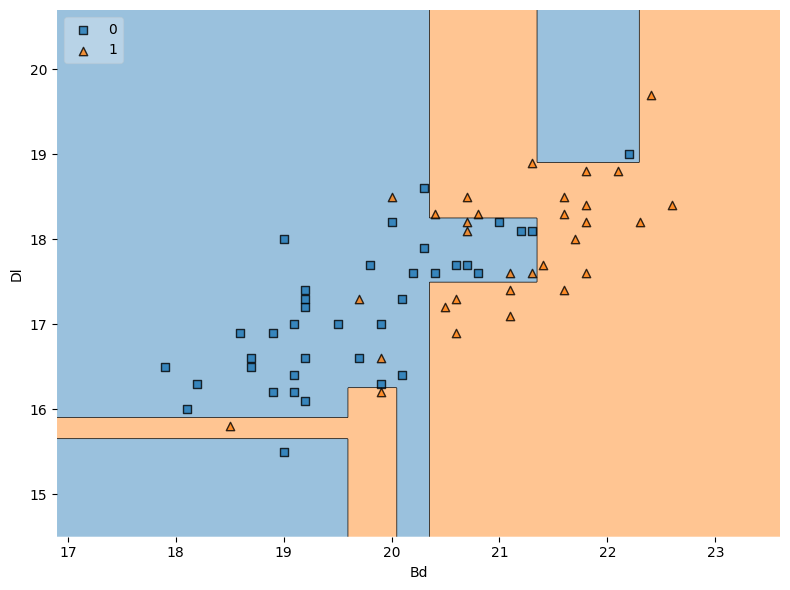

In [20]:
from mlxtend.plotting import plot_decision_regions
plt.rcParams['figure.figsize'] = (8, 6)
attr1 = 'Bd'
attr2 = 'Dl'

treeP, X_train_np, y_train_np = plot_DT(X_train, y_train, attr1, attr2, depth, 1)

plot_decision_regions(X=X_train_np, 
                      y=y_train_np, 
                      clf=treeP,
                      legend=2)

plt.xlabel(attr1)
plt.ylabel(attr2)
plt.tight_layout()

plt.savefig('Syene-DecisionTree2D.pdf', bbox_inches='tight')
plt.show()

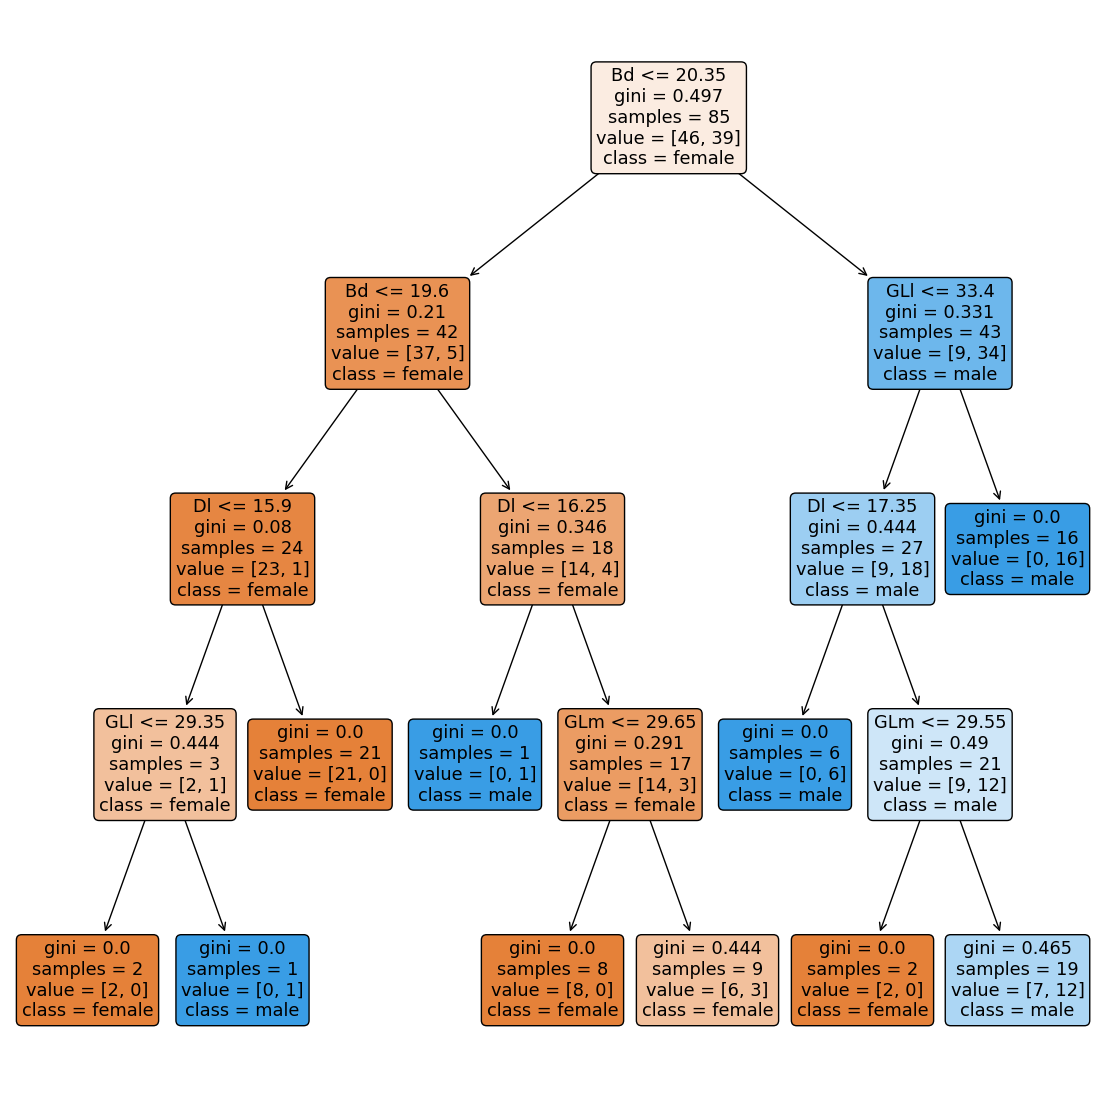

In [21]:
from sklearn.tree import plot_tree
plt.rcParams['figure.figsize'] = [14, 14]
tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)

plt.figure()
tree.fit(X, y)
plot_tree(tree,
          filled=True,
          rounded=True,
          class_names=['female', 'male'],
          feature_names=col_talus)
plt.title("")

plt.savefig('Syene-DecisionTree.pdf', bbox_inches='tight')
plt.show()

### MLP

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [23]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (5,),(10,),(20,),(100,),(5,5,),(10,10,),(20,20,),(100,100,),(5,5,5,),(10,10,10,),(20,20,20,),(100,100,100,),(5,5,5,5,),(10,10,10,10,),(20,20,20,20,)
             ],
            'learning_rate_init': [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.05]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.002, 'solver': 'lbfgs'}


In [24]:
def cv_MLP(hls, activation, solver, learning_rate_init, max_iter, rs, X_train, y_train):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    mlp = MLPClassifier(hidden_layer_sizes= hls,
                    activation=activation,
                    solver=solver,
                    alpha=0.05,
                    learning_rate='adaptive',
                    learning_rate_init=learning_rate_init,
                    max_iter=max_iter, 
                    random_state=rs)
    cv_scores = cross_val_score(mlp, X_train, y_train, scoring='accuracy', cv=cv)
    return cv_scores

def perform_MLP(hls, activation, solver, learning_rate_init, max_iter, rs, X_train, X_test, y_train, y_test):
    mlp = MLPClassifier(hidden_layer_sizes= hls,
                    activation=activation,
                    solver=solver,
                    alpha=0.05,
                    learning_rate='adaptive',
                    learning_rate_init=learning_rate_init,
                    max_iter=max_iter, 
                    random_state=rs).fit(X_train, y_train)
    prob = mlp.predict_proba(X_test)
    y_pred = mlp.predict(X_test)
    acc = mlp.score(X_test, y_test)
    return y_pred, acc, prob

In [30]:
MLP_scores = cv_MLP((20,20), 'logistic', 'lbfgs', 0.002, 300, 10, X_train, y_train) #cv_MLP((100,100,100), 'tanh', 'lbfgs', 0.002, 300, 10, X_train, y_train)
print(MLP_scores)
print(np.mean(MLP_scores))
MLP_result = perform_MLP((20,20), 'logistic', 'lbfgs', 0.002, 300, 10, X_train, X_test, y_train, y_test)
MLP_result

[0.71428571 1.         0.57142857 0.71428571 0.42857143 0.71428571
 0.71428571 0.71428571 1.         0.66666667 0.85714286 0.85714286
 0.57142857 0.85714286 0.85714286 0.85714286 0.85714286 0.57142857
 0.83333333 0.5        0.71428571 0.71428571 0.57142857 0.71428571
 0.85714286 0.85714286 0.57142857 0.71428571 0.83333333 1.        ]
0.7468253968253968


(array(['1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1',
        '0', '1', '1', '1'], dtype='<U1'),
 0.6470588235294118,
 array([[0.28901892, 0.71098108],
        [0.22107425, 0.77892575],
        [0.31610134, 0.68389866],
        [0.28780252, 0.71219748],
        [0.33580364, 0.66419636],
        [0.504224  , 0.495776  ],
        [0.97762286, 0.02237714],
        [0.55598961, 0.44401039],
        [0.67052248, 0.32947752],
        [0.43235347, 0.56764653],
        [0.75329376, 0.24670624],
        [0.72951658, 0.27048342],
        [0.21364069, 0.78635931],
        [0.66733062, 0.33266938],
        [0.03887343, 0.96112657],
        [0.41873568, 0.58126432],
        [0.46947154, 0.53052846]]))

### Comparison of all Methods

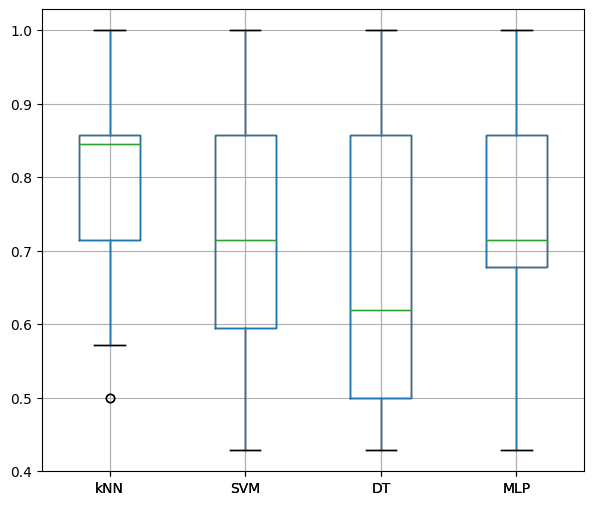

In [31]:
plt.rcParams['figure.figsize'] = [7, 6]

results_supervised = pd.DataFrame({'kNN': kNN_scores, 'SVM': SVM_scores, 'DT': DT_scores, 'MLP': MLP_scores})

fig1, ax1 = plt.subplots()
#ax1.set_title('Comparison of Accuracy')
ax1.boxplot(results_supervised)
boxplot = results_supervised.boxplot(column=['kNN', 'SVM', 'DT', 'MLP'])

fig1.savefig('Syene-Comparison.pdf', bbox_inches='tight')

In [32]:
results_supervised.mean(axis=0)

kNN    0.789683
SVM    0.757143
DT     0.661905
MLP    0.746825
dtype: float64

In [33]:
results_supervised.max(axis=0)

kNN    1.0
SVM    1.0
DT     1.0
MLP    1.0
dtype: float64